<a href="https://colab.research.google.com/github/nahid0335/GradePrediction/blob/main/DecisionTreeandKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [54]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
from sklearn import tree

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
# load dataset
df = pd.read_csv("/content/drive/Shareddrives/share drive/Dataset/pima indian diabetes/diabetes.csv")

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
drive.flush_and_unmount()

In [59]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[feature_cols]
y = df.Outcome

In [60]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [61]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT.predict(X_test)

In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


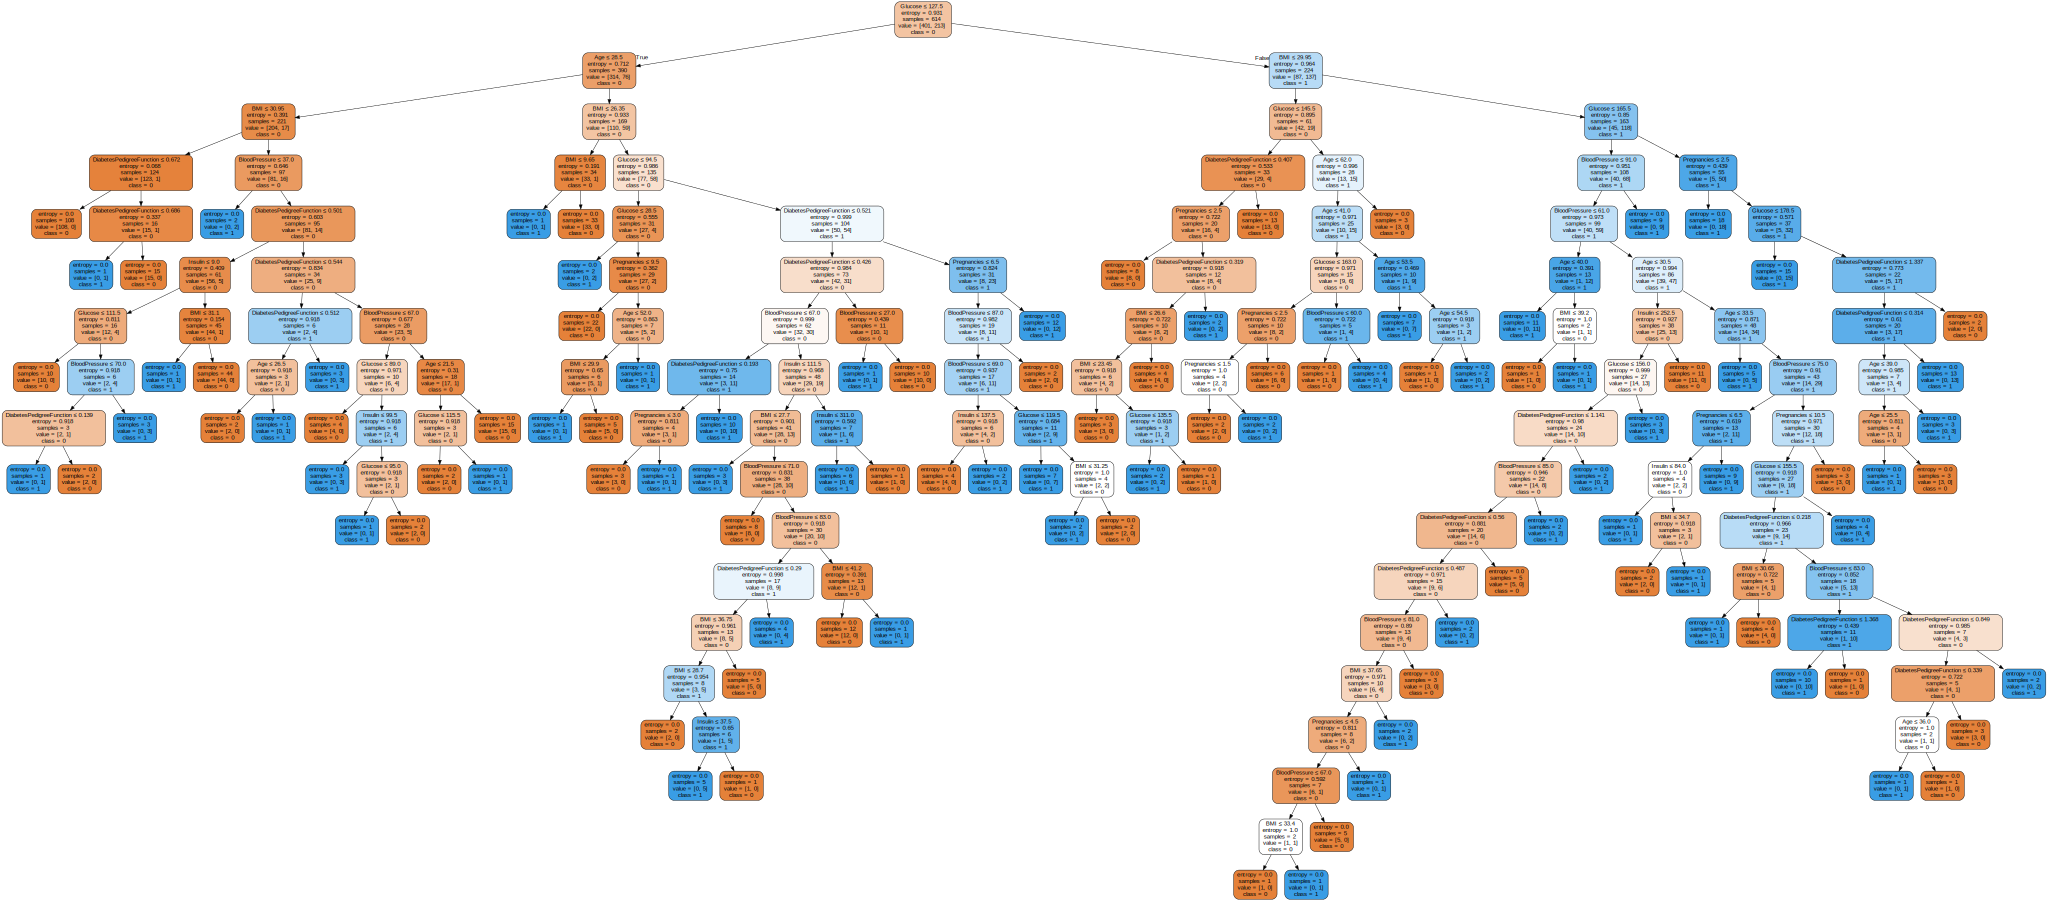

In [63]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# KNN

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train[0:4,:]

array([[-0.52639686, -0.70120553, -4.13525578, -1.03594038, -1.15139792,
        -3.75268255, -0.49073479],
       [ 1.58804586, -0.70120553, -0.48916881,  1.48710085, -0.27664283,
         0.68034485,  2.41502991],
       [-0.82846011,  0.01344832, -0.42452187, -0.94893896,  0.56687102,
        -1.2658623 ,  0.54916055],
       [-1.13052335, -0.70120553, -1.30372015,  2.79212217,  1.2541786 ,
        -1.04961706, -0.63929127]])

In [66]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = KNN.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7207792207792207
[[78 21]
 [22 33]]


In [69]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.35064935064935066
0.3246753246753247
0.2922077922077922
0.2857142857142857
0.2792207792207792
0.2597402597402597
0.2662337662337662
0.2597402597402597
0.2662337662337662
0.2532467532467532
0.2792207792207792
0.2662337662337662
0.2727272727272727
0.2532467532467532
0.23376623376623376
0.2727272727272727
0.24675324675324675
0.24025974025974026
0.2597402597402597
0.2662337662337662
0.2662337662337662
0.2532467532467532
0.2662337662337662
0.2727272727272727
0.2662337662337662
0.24675324675324675
0.2792207792207792
0.2662337662337662
0.2727272727272727
0.2532467532467532
0.2597402597402597
0.2532467532467532
0.2532467532467532
0.24675324675324675
0.2532467532467532
0.24675324675324675
0.2597402597402597
0.2532467532467532
0.2597402597402597


Text(0, 0.5, 'Mean Error')

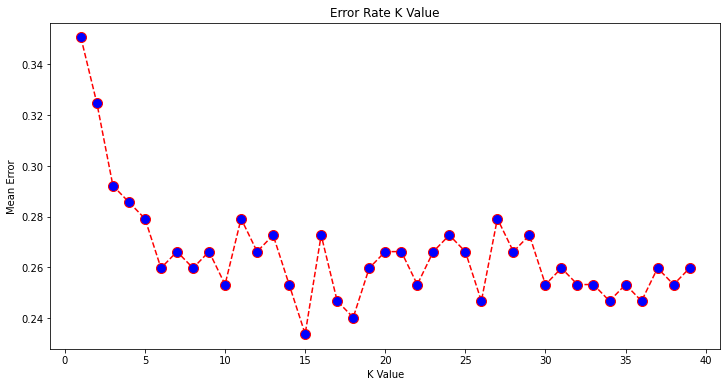

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')